# 🏁Análise de Corrida de Fórmula 1 com Python 🏎️
### GP de Abu Dhabi 2021 - Consistência dos Pilotos
Este notebook faz parte do projeto **f1-analyst-with-python**, onde analisamos os dados da Fórmula 1 usando Python.

Nesta análise, iremos estudar elementos como a **consistência dos tempos de volta, posições, pit stops e qualificaçõs** dos pilotos e analisar resultados dos contrutores no polêmico Grande Prêmio de Abu Dhabi de 2021.

### Configurações iniciais

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd


plt.style.use('seaborn-v0_8')
sns.set_theme(style='whitegrid')


### Carregamento dos Dados

In [9]:
from config import RACES_CSV, DRIVERS_CSV, lAP_TIMES_CSV

races = pd.read_csv(RACES_CSV)
drivers = pd.read_csv(DRIVERS_CSV)
lap_times = pd.read_csv(lAP_TIMES_CSV)

### Visualização Inicial dos Dados

In [10]:
display(races.head())
display(drivers.head())
display(lap_times.head())

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


## Consistência dos Pilotos 



### Obejtivo:
Calcular o **desvio padrão dos tempos de volta** de cada piloto durante a corrida, como uma medida de **consistência**. Quanto menor o desvio padrão, mais consistentes foram os tempos de volta do piloto.

In [11]:
from script.Lap_Times_Consistency import lap_times_consistency

### Vizualização Gráfica da Consistência dos Pilotos no GP de Abu Dhabi 2021

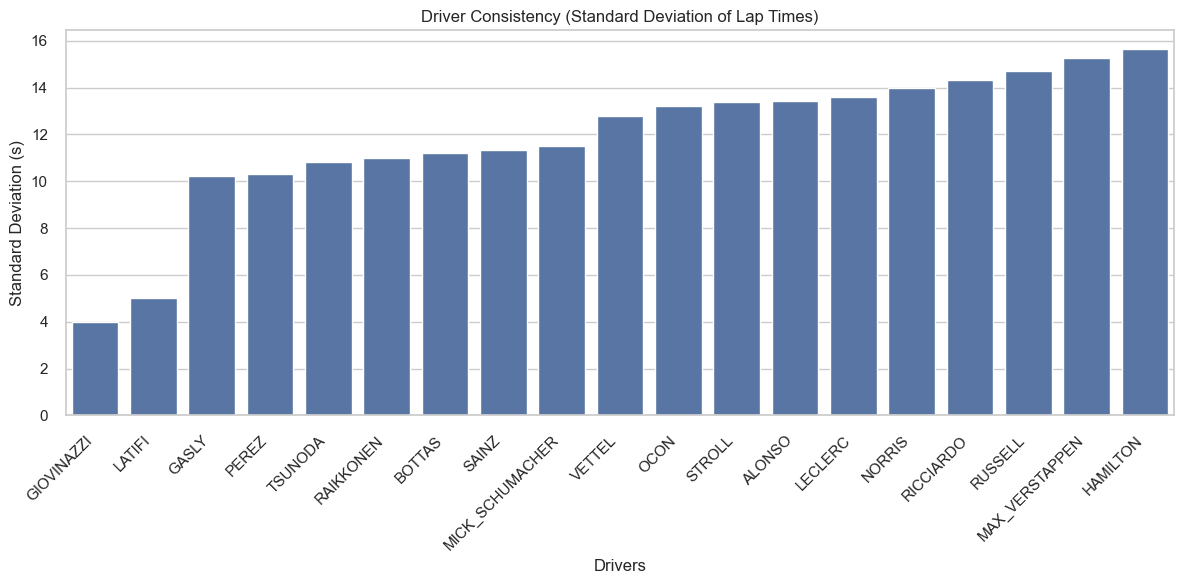

None

In [12]:
consistency_result = lap_times_consistency(lap_times, drivers)
display(consistency_result)

### Conclusão
- Essa análise mostra quais pilotos foram mais consistentes durante a corrida.
